<a href="https://colab.research.google.com/github/FariaParvinMegha/thesis/blob/main/Kidney_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
import glob
import matplotlib.pyplot as plt

In [5]:
path = "/content/drive/MyDrive/kidney"

In [6]:
!pip install split-folders

In [7]:
import splitfolders
splitfolders.ratio(
    "/content/drive/MyDrive/kidney",
   output="./dataset",
   seed=7,
   ratio=(0.8,0.1, 0.1)
)

Copying files: 12466 files [04:34, 45.47 files/s] 


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.2,
    vertical_flip=True,
    horizontal_flip = True,
    fill_mode="reflect")


train_generator = train_datagen.flow_from_directory(
    './dataset/train',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64,)

val_datagen = ImageDataGenerator(rescale = 1/255.0)


val_generator = train_datagen.flow_from_directory(
     './dataset/val',
    target_size=(224, 224),
     class_mode='categorical',
    batch_size = 64,)

Found 9971 images belonging to 4 classes.
Found 1244 images belonging to 4 classes.


In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential,Model

In [10]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [11]:
given_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 3s 0us/step


In [12]:
for layer in given_model.layers:
    layer.trainable = False

In [13]:
top_model = Flatten()(given_model.output)
top_model = Dense(512, activation='relu')(top_model)
top_model = Dropout(0.1)(top_model)
top_model = Dense(256, activation='relu')(top_model)
top_model = Dropout(0.05)(top_model)
top_model = Dense(128, activation='relu')(top_model)
top_model = Dropout(0.05)(top_model)
top_model = Dense(4, activation='softmax')(top_model)

In [14]:
model = Model(inputs=given_model.input, outputs=top_model)

In [15]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator)

Epoch 1/15
156/156 [==============================] - 218s 1s/step - loss: 2.5785 - accuracy: 0.5664 - val_loss: 0.6485 - val_accuracy: 0.7468
Epoch 2/15
156/156 [==============================] - 214s 1s/step - loss: 0.7082 - accuracy: 0.7308 - val_loss: 0.5962 - val_accuracy: 0.7596
Epoch 3/15
156/156 [==============================] - 191s 1s/step - loss: 0.5723 - accuracy: 0.7787 - val_loss: 0.5119 - val_accuracy: 0.8119
Epoch 4/15
156/156 [==============================] - 187s 1s/step - loss: 0.5004 - accuracy: 0.8114 - val_loss: 0.3592 - val_accuracy: 0.8818
Epoch 5/15
156/156 [==============================] - 190s 1s/step - loss: 0.4569 - accuracy: 0.8256 - val_loss: 0.3873 - val_accuracy: 0.8489
Epoch 6/15
156/156 [==============================] - 187s 1s/step - loss: 0.4021 - accuracy: 0.8518 - val_loss: 0.3686 - val_accuracy: 0.8593
Epoch 7/15
156/156 [==============================] - 187s 1s/step - loss: 0.3791 - accuracy: 0.8551 - val_loss: 0.2864 - val_accuracy: 0.8947

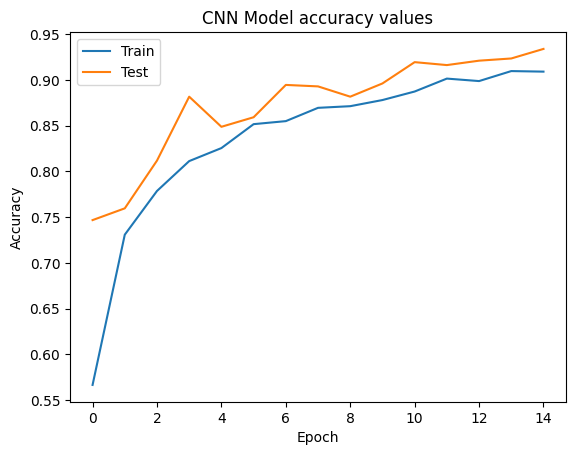

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

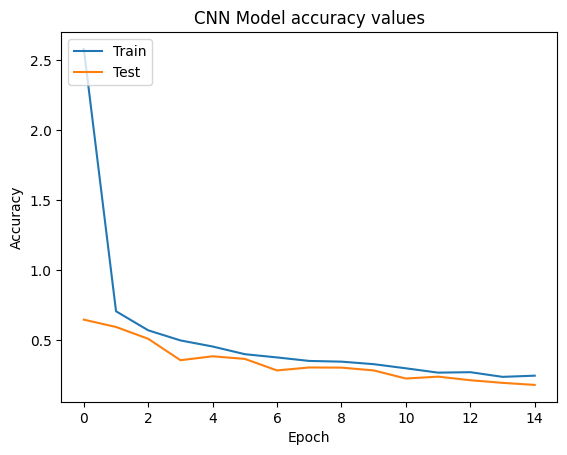

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
test_datagen = ImageDataGenerator(rescale = 1/255.0)


test_generator = train_datagen.flow_from_directory(
     './dataset/test',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64,shuffle = False)

Found 1251 images belonging to 4 classes.


In [21]:
pred = model.predict_generator(test_generator)

<ipython-input-21-f79076686fd5>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_generator)


In [22]:
model.evaluate_generator(test_generator)

<ipython-input-22-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.17612645030021667, 0.9368505477905273]

In [23]:
y_pred = np.argmax(pred, axis = 1)
y_pred

array([0, 0, 0, ..., 3, 3, 3])

In [24]:
y_true = test_generator.classes

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[358,   3,   4,   8],
       [  0, 485,  14,  11],
       [ 17,  15, 102,   5],
       [  2,   6,   0, 221]])

In [26]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       373
           1       0.95      0.95      0.95       510
           2       0.85      0.73      0.79       139
           3       0.90      0.97      0.93       229

    accuracy                           0.93      1251
   macro avg       0.91      0.90      0.91      1251
weighted avg       0.93      0.93      0.93      1251

